In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("CTWS2021-robo-Template.ipynb")

Für dieses Notebook benötigen Sie zwei Module ``roboworld`` und ``otter-grader``. Installieren Sie diese z.B. durch:

```
pip install otter-grader
pip install roboworld
```

# Roboterwelt

Roboter dienen uns heute in vielen Bereichen als Helfer und Assistenten.
Sie fertigen Autos und andere große Maschinen an, spielen gegeneinander Fußball und interagieren mit uns Menschen auf direktem Weg.
Roboter können dort eingesetzt werden, wo es für den Menschen zu gefährlich wird.
Zum Beispiel, hatte man versucht durch einen Roboter die Lage am Kernreaktor von Chernobyl besser zu analysieren.
Ein weiteres Beispiel ist die Entschärfung von Sprengstoff oder das Auffinden von Überlebenden, welche unter Gebäuden begraben wurden.

Wir werden heute einen Roboter durch eine zweidimensionale Welt bewegen.

Um die Welt und ihren Roboter anzuzeigen benötigen Sie das Modul ``roboworld``.

In [1]:
import roboworld as rw

Dieser Befehl sorgt dafür, dass das *Modul* ``roboworld`` in unser Notebook importiert (eingefügt) wird. Um nicht immer den langen Namen ``roboworld`` tippen zu müssen, wählen wir die Abkürzung ``rw``. 

Lassen Sie uns eine Roboterwelt mit 5 Zeilen ``nrows`` und 9 Spalten ``ncols`` erzeugen:

In [2]:
world = rw.new_world(nrows = 5, ncols = 9)

Wir sagen dem ``Modul``, dass es uns eine neue Welt erzeugen soll. Jetzt können wir dieser Welt ``world`` sagen, dass sie sich selbst bitte anzeigen soll:

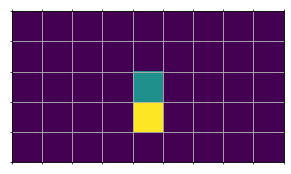

In [3]:
world.show()

Ok! Was wir sehen sind Zellen angeordnet in 5 Reihen und 9 Spalten. Fast alle Zellen sind Lila nur zwei Zellen haben eine andere Farbe. Die gelbe Zelle ist jene, auf der sich unser Roboter befindet und die türkise Zelle markiert das Ziel des Roboters. Dummerweise kann sich unser Roboter nur nach vorne bewegen und sich auch nur um 90 Grad nach links drehen.

***
***Aufgabe 1.*** 
Erzeugen Sie eine Welt ``world`` mit einer Zeile und zehn Spalten.

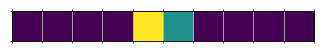

In [4]:
myworld = rw.new_world(nrows = 1, ncols = 10) # SOLUTION
myworld.show()

In [ ]:
grader.check("q1")

***

Soweit so gut. Wir haben also eine Welt ``world`` und in dieser befindet sich unser Roboter.
Wie können wir unseren Roboter nun steuern?
Wir müssen der Welt sagen, sie solle uns doch bitte den Roboter geben.

Wir können daraufhin mit ``help(robo)`` herausfinden was der Roboter denn so kann.

In [7]:
robo = world.get_robo()
help(robo)

Help on Agent in module roboworld.agent object:

class Agent(builtins.object)
 |  Agent(position, world, agent_direction=<Direction.EAST: (0, 1)>, print_actions=True) -> None
 |  
 |  Methods defined here:
 |  
 |  __init__(self, position, world, agent_direction=<Direction.EAST: (0, 1)>, print_actions=True) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  disable_print(self)
 |  
 |  enable_print(self)
 |  
 |  front_is_clear(self)
 |  
 |  is_at_goal(self)
 |  
 |  is_carrying_object(self) -> bool
 |  
 |  is_facing_north(self) -> bool
 |  
 |  is_mark_in_front(self) -> bool
 |  
 |  is_object_in_front(self)
 |      # non-privates
 |  
 |  is_wall_in_front(self) -> bool
 |  
 |  move(self)
 |  
 |  print(self, fstring)
 |  
 |  put(self)
 |  
 |  set_mark(self)
 |  
 |  take(self)
 |  
 |  toss(self)
 |  
 |  turn_left(self)
 |  
 |  unset_mark(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descript

***
***Aufgabe 2.*** 
Testen Sie was die Methode ``move`` des Roboters tut, rufen Sie sie dazu mit ``robo.move()`` auf.

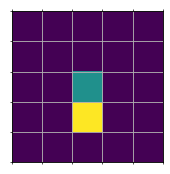

In [8]:
world = rw.new_world(nrows = 5, ncols = 5)
robo = world.get_robo()
world.show()

move (2,2) -> (2,3)


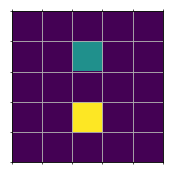

In [9]:
robo.move() # SOLUTION
world.show()

***

Der Roboter bewegt sich ein Feld nach oben (Richtung Norden). Wir haben jedoch oben eine neue Welt mit 5 Spalten und 5 Zeilen erzeugt. Was wird passieren wenn wir eine Welt mit 5 Spalten aber nur 1 Zeile erzeugen und den Roboter bewegen?

***
***Aufgabe 3.*** 
Erzeugen Sie eine Welt ``world`` mit 5 Spalten und 1 Zeile. Bewegen Sie den Roboter **dieser** Welt um ein Feld. Führen Sie also lediglich ``move`` aus.

In [10]:
world = rw.new_world(nrows = 1, ncols = 5, agent_position=[0,0]) # SOLUTION
robo = world.get_robo() # SOLUTION
robo.move() # SOLUTION

WallInFrontException: There is a wall in front.

***

Da scheint was schiefgegangen zu sein. Wir erhalten den Fehler: ``There is a wall in front.`` somit kann sich unser Roboter wohl nicht bewegen.

***
***Aufgabe 4.*** 
Lösen Sie das Problem. Lassen Sie den Roboter um ein Feld nach rechts (Osten) laufen. **Tipp:** Der Roboter bietet die Methode ``turn_left`` an.

In [15]:
world = rw.new_world(nrows = 1, ncols = 5) # SOLUTION
robo = world.get_robo() # SOLUTION
robo.turn_left() # SOLUTION
robo.move() # SOLUTION

turn Direction.NORTH -> Direction.WEST
move (2,0) -> (1,0)


[0, 1]

In [ ]:
grader.check("q4")

***

Soweit so gut. Wir wissen also nun, wie wir den Roboter nach links drehen können sodass er auch in eine andere Richtung als Norden laufen kann. Wie wäre es wenn wir unseren (türkisen) Roboter nun zu unserem (gelben) Ziel bewegen?

***
***Aufgabe 5.*** 
Bewegen Sie Ihren Roboter ``robo`` auf das Ziel. Gehen Sie davon aus, dass der Roboter bzw. Sie wissen wo das Ziel ist. Nach der Erstellung der Welt ist der Roboter nach Norden ausgerichtet.

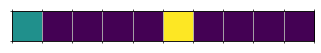

In [17]:
mycorridor = rw.new_world(nrows = 1, ncols = 10, agent_position=[0,0], goal_position=[0, 5])
robo = mycorridor.get_robo()
mycorridor.show()

In [18]:
# BEGIN SOLUTION
robo.turn_left()
robo.turn_left()
robo.turn_left()
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()
# END SOLUTION

turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (0,0) -> (1,0)
move (1,0) -> (2,0)
move (2,0) -> (3,0)
move (3,0) -> (4,0)
move (4,0) -> (5,0)


[0, 5]

In [ ]:
grader.check("q5")

***

Um den Roboter nach rechts zum Ziel zu bewegen mussten wir Ihn erst einmal um 270 Grad nach links drehen. In anderen Worten wir mussten 3x ``robo.turn_left()`` aufrufen. Lassen Sie uns dieses **Was** (nach rechts Drehen) in eine ``Python``-Funktion packen!

Funktionen sind gebündelte *Ausdrucke* kombiniert mit optionalen Argumenten.
In ``Python`` beginnt eine Funktionsdefinition mit dem Signalwort ``def`` gefolgt von dem *Funktionsnamen*, dann folgt eine offene Klammer ``(`` und die Argumente getrennt mit Komma. Die Liste an Argumenten wird mit der geschlossenen Klammer ``)`` und dem Doppelpunkt ``:`` abgeschlossen. 

```python
def function(argument1, argument2):
    expression1
    expression2
    ...
```

Lange Rede kurzer Sinn, probieren Sie es einfach aus.

***
***Aufgabe 6.*** 
Definieren Sie eine Funktion ``turn_right(robo)`` mit dem Argument ``robo`` was Ihr Roboter ist.

In [20]:
def turn_right(robo):
    # BEGIN SOLUTION
    robo.turn_left()
    robo.turn_left()
    robo.turn_left()
    # END SOLUTION

In [ ]:
grader.check("q6")

***

Sie sehen wir haben das Problem *nach rechts drehen* durch die Teilprobleme *nach links drehen* gelöst. Schaffen Sie es nun den Roboter durch ein Labyrinth zu bewegen?

***
***Aufgabe 7.*** 
Bewegen Sie den Roboter durch folgendes Labyrinth. Verwenden Sie ``robo.turn_left()``, ``robo.move()`` und Ihre Funktion ``turn_right(robo)``. Ihr Roboter ist nach Norden ausgerichtet.

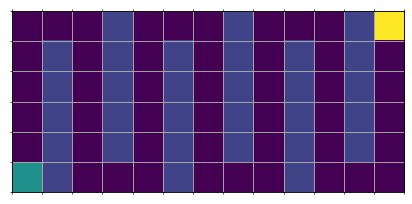

In [25]:
maze = rw.maze()
robo = maze.get_robo()
maze.show()

Die blauen Zellen sind Hindernisse und könne nicht vom Roboter betreten werden. Läuft der Roboter in eine Wand oder ein Hindernis kommt es zu einem Fehler.

In [26]:
# BEGIN SOLUTION
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()

turn_right(robo)
robo.move()
robo.move()
turn_right(robo)
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()

robo.turn_left()
robo.move()
robo.move()
robo.turn_left()
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()

turn_right(robo)
robo.move()
robo.move()
turn_right(robo)
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()

robo.turn_left()
robo.move()
robo.move()
robo.turn_left()
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()

turn_right(robo)
robo.move()
robo.move()
turn_right(robo)
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()

robo.turn_left()
robo.move()
robo.move()
robo.turn_left()
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()

# END SOLUTION

move (0,0) -> (0,1)
move (0,1) -> (0,2)
move (0,2) -> (0,3)
move (0,3) -> (0,4)
move (0,4) -> (0,5)
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (0,5) -> (1,5)
move (1,5) -> (2,5)
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
move (2,5) -> (2,4)
move (2,4) -> (2,3)
move (2,3) -> (2,2)
move (2,2) -> (2,1)
move (2,1) -> (2,0)
turn Direction.SOUTH -> Direction.EAST
move (2,0) -> (3,0)
move (3,0) -> (4,0)
turn Direction.EAST -> Direction.NORTH
move (4,0) -> (4,1)
move (4,1) -> (4,2)
move (4,2) -> (4,3)
move (4,3) -> (4,4)
move (4,4) -> (4,5)
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (4,5) -> (5,5)
move (5,5) -> (6,5)
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
move (6,5) -> (6,4)
move (6,4) -> 

[5, 12]

In [ ]:
grader.check("q7")

Das war viel Schreibarbeit. Erkennen Sie ein Muster was sich immer und immer wieder wiederholt?

Möchten wir in ``Python`` eine folge von *Anweisungen* ``n``-mal ausführen so verwenden wir eine sogenannte Schleife. Zum Beispiel können wir mit folgendem Code ``n``-mal ``'Hallo Welt!'`` ausgeben:

In [28]:
for i in range(5):
    print('Hello Welt!')

Hello Welt!
Hello Welt!
Hello Welt!
Hello Welt!
Hello Welt!


Zu Deutsch: Für jedes ``i`` was sich in ``range(n)`` befindet führe bitte ``print('Hello Welt!')`` aus. Dabei ist ``range(n)`` eine Folge/Sequenz von ganzen Zahlen $0, 1, \ldots, n-1$. D.h. ``range(5)`` ist eine Sequenz bestehend aus ``0, 1, 2, 3, 4``. Jeder dieser Zahlen wird der Variablen ``i`` *zugewiesen* und anschließend werden die Anweisungen innerhalb der Schleife ausgeführt. Lassen Sie uns doch gleich ``i`` mit ausgeben:

In [29]:
for i in range(5):
    print('Hello Welt! i = ' + str(i))

Hello Welt! i = 0
Hello Welt! i = 1
Hello Welt! i = 2
Hello Welt! i = 3
Hello Welt! i = 4


``i`` ist eine Zahl und mit ``str(i)`` wandeln wir diese in eine Zeichenkette um. Die Addition ``'Hello Welt! i = ' + str(i)`` verkettet die beiden Zeichenketten.

***
***Aufgabe 8.*** 
Geben Sie alle Quadratzahlen von 1 bis 100 aus.

In [30]:
for i in range(100):
    print((i+1) * (i+1))

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400
441
484
529
576
625
676
729
784
841
900
961
1024
1089
1156
1225
1296
1369
1444
1521
1600
1681
1764
1849
1936
2025
2116
2209
2304
2401
2500
2601
2704
2809
2916
3025
3136
3249
3364
3481
3600
3721
3844
3969
4096
4225
4356
4489
4624
4761
4900
5041
5184
5329
5476
5625
5776
5929
6084
6241
6400
6561
6724
6889
7056
7225
7396
7569
7744
7921
8100
8281
8464
8649
8836
9025
9216
9409
9604
9801
10000


***

Lassen Sie uns nun Schleifen nutzten um unseren Roboter bequemer steuern zu können.

***
***Aufgabe 9.*** 
Schreiben Sie eine Funktion ``move(robo, steps)`` die den Roboter ``robo`` um ``steps`` Schritte nach vorne bewegt.

In [31]:
def move(robo, steps):
    # BEGIN SOLUTION
    for i in range(steps):
        robo.move()
    # END SOLUTION

In [ ]:
grader.check("q9")

***

Testen Sie Ihre neue Funktion

turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST


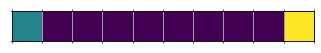

In [33]:
world = rw.new_world(nrows = 1, ncols = 10, agent_position=[0,0], goal_position=[0,9])
robo = world.get_robo()
turn_right(robo)
world.show()

Es wird Zeit, dass wir die neue Funktion auch wirklich verwenden.

***
***Aufgabe 10.*** 
Blicken Sie auf Ihre Lösung aus ***Aufgabe 8***. Lösen Sie diese erneut verwenden Sie jedoch Ihre neue Funktion ``move(robo, steps)``.

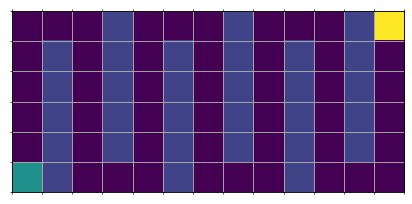

In [34]:
maze = rw.maze()
robo = maze.get_robo()
maze.show()

In [35]:
# BEGIN SOLUTION
move(robo, 5)

turn_right(robo)
move(robo, 2)
turn_right(robo)
move(robo, 5)

robo.turn_left()
move(robo, 2)
robo.turn_left()
move(robo, 5)

turn_right(robo)
move(robo, 2)
turn_right(robo)
move(robo, 5)

robo.turn_left()
move(robo, 2)
robo.turn_left()
move(robo, 5)

turn_right(robo)
move(robo, 2)
turn_right(robo)
move(robo, 5)

robo.turn_left()
move(robo, 2)
robo.turn_left()
move(robo, 5)

# END SOLUTION

move (0,0) -> (0,1)
move (0,1) -> (0,2)
move (0,2) -> (0,3)
move (0,3) -> (0,4)
move (0,4) -> (0,5)
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (0,5) -> (1,5)
move (1,5) -> (2,5)
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
move (2,5) -> (2,4)
move (2,4) -> (2,3)
move (2,3) -> (2,2)
move (2,2) -> (2,1)
move (2,1) -> (2,0)
turn Direction.SOUTH -> Direction.EAST
move (2,0) -> (3,0)
move (3,0) -> (4,0)
turn Direction.EAST -> Direction.NORTH
move (4,0) -> (4,1)
move (4,1) -> (4,2)
move (4,2) -> (4,3)
move (4,3) -> (4,4)
move (4,4) -> (4,5)
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (4,5) -> (5,5)
move (5,5) -> (6,5)
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
move (6,5) -> (6,4)
move (6,4) -> 

In [ ]:
grader.check("q10")

Erkennen Sie weitere Muster? Der Roboter läuft einmal noch oben und dann 3x nach unten und wieder noch oben. Diese drei sich wiederholenden Abläufe müssen wir nicht 3x niederschreiben! Im folgenden benutzten wir eine weitere Schleife um den Code weiter zu verkürzen.

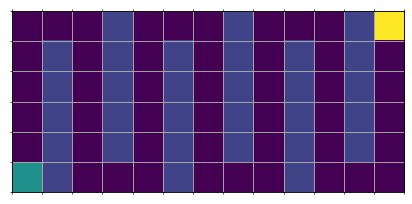

In [37]:
maze = rw.maze()
robo = maze.get_robo()
robo.disable_print() # hiermit verhindern wir die Ausgabe
maze.show()

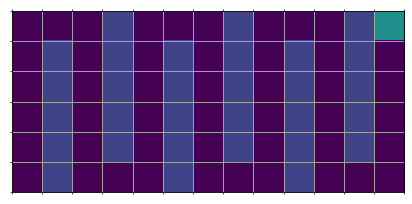

In [38]:
move(robo, 5)

for i in range(3):
    turn_right(robo)
    move(robo, 2)
    turn_right(robo)
    move(robo, 5)

    robo.turn_left()
    move(robo, 2)
    robo.turn_left()
    move(robo, 5)

maze.show()

Ok, bis hierher sind wir davon ausgegangen, dass wir wissen wie die Roboterwelt aussieht und wo sich der Roboter befindet und wie er ausgerichtet ist (Norden, Süden, Osten, Westen). Damit ist nun Schluss! Ein echter Roboter weiß nicht viel. Er weiß nicht wo er ist und auch nicht wo das Ziel ist. Allerdings kann er abtasten ob direkt vor ihm eine Wand is ``robo.is_wall_in_front()`` und er weiß ob er noch Norden ausgerichtet ist ``robo.is_facing_north()``.
Wir haben also bis hierher folgende Funktionen zur Verfügung:

+ ``robo.move()``: bewegt ``robo`` ein Feld nach vorne
+ ``move(robo, steps)``: bewegt ``robo`` um ``steps`` Felder nach vorne
+ ``robo.turn_left()``: dreht ``robo`` um 90 nach links
+ ``turn_right(robo)``: dreht ``robo`` um 90 nach rechts
+ ``robo.is_wall_in_front()``: gibt ``True`` zurück wenn vor dem ``robo`` eine Wand ist und sonst ``False``.
+ ``robo.is_facing_north()``: gibt ``True`` zurück wenn ``robo`` nach Norden ausgerichtet ist und sonst ``False``.

Zuätzlich hätten wir gerne folgenden Funktionen:

+ ``turn_to_north(robo)``: dreht ``robo`` nach Norden
+ ``turn_to_west(robo)``: dreht ``robo`` nach Westen
+ ``turn_to_east(robo)``: dreht ``robo`` nach Osten
+ ``turn_to_south(robo)``: dreht ``robo`` nach Süden

Für die Ausrichtung nach Norden, Westen, Osten oder Süden könnte ein weiterer Schleifentyp von nutzten sein: die ``while``-Schleife. Diese verwenden wir wenn wir etwas solange wiederholen wollen bis eine bestimmte Bedingung erfüllt ist. Wir müssen also gar nicht wissen wann das genau der Fall ist. Angenommen wir wollen die größte ganze Zahl $k$ berechnen sodass $k < \sqrt{65242}$. Nichts leichter als das:

In [39]:
k = 1
while k < 65242**(0.5):
    k = k + 1
k

256

In [40]:
k*k

65536

``65242**(0.5)`` bedeutet $65242^{0.5} = \sqrt{65242}$

***
***Aufgabe 11.*** 
Schreiben Sie eine Funktion ``turn_to_north(robo)`` die den Roboter nach Norden ausrichtet. **Tipp:** Verwenden Sie eine ``while``-Schleife in Kombination mit ``robo.is_facing_north()``, ``not`` und ``robo.turn_left()``.

In [41]:
def turn_to_north(robo):
    # BEGIN SOLUTION
    while not robo.is_facing_north():
        robo.turn_left()
    # END SOLUTION

In [ ]:
grader.check("q11")

***Aufgabe 12.*** 
Schreiben Sie nun Funktionen ``turn_to_west(robo)``, ``turn_to_south(robo)``. ``turn_to_east(robo)`` unter Verwendung von ``turn_to_north(robo)``. **Tipp:** Keine dieser Funktionen benötigt eine Schleife sondern lediglich **zwei** Anweisungen!

In [43]:
def turn_to_west(robo):
    # BEGIN SOLUTION
    turn_to_north(robo)
    robo.turn_left()
    # END SOLUTION
    
def turn_to_south(robo):
    # BEGIN SOLUTION
    turn_to_west(robo)
    robo.turn_left()
    # END SOLUTION
    
def turn_to_east(robo):
    # BEGIN SOLUTION
    turn_to_south(robo)
    robo.turn_left()
    # END SOLUTION

In [ ]:
grader.check("q12")

***

Zücken Sie Stift und Papier, denn jetzt kommt eine Aufgabe bei der Sie Ihre Gehirnmuskeln anstrengen müssen und die viele Lösungen bietet. Unser Roboter ist bis hier hin noch nicht sonderlich intelligent. Wir wollen nun einen Algorithmus entwerfen, der den Roboter garantiert zu seinem Ziel führt. Wir wissen dabei dass:

1. die Welt Rechteckig ist und
2. sich in der Welt keine Wände (bis auf die Außenwände) befinden.

Wir wissen aber nicht aus wie viele Spalten und Zeilen die Welt besteht und wo sich der Roboter befindet oder wie er ausgerichtet ist. Zum Beispiel könnte die Welt so aussehen:

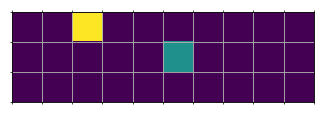

In [47]:
nrows = 3
ncols = 10
world = rw.new_world(nrows = nrows, ncols = ncols)
world.show()

Bevor wir loslegen wollen wir Ihnen noch eine Funktion anbieten, die Ihnen helfen könnte. Mit ``robo.is_at_goal()`` können Sie prüfen ob sich robo auf dem Ziel befindet.

***
***Aufgabe 13.*** 
Beschreiben Sie welchen Effekt folgende Funktion ``walk_to_wall(robo)`` auf ``robo`` hat.

In [48]:
def walk_to_wall(robo):
    while not robo.is_wall_in_front() and not robo.is_at_goal():
        robo.move()
    return robo.is_at_goal()

_Type your answer here, replacing this text._

``walk_to_wall(robo)`` bewegt ``robo`` geradeaus solange bis er auf eine Wand oder das Ziel trifft.

***

***
***Aufgabe 14.*** 
Schreiben Sie nun Funktionen ``move_to_goal(robo)`` die ``robo`` in einer rechteckigen Welt ohne Hindernisse sicher zum Ziel bewegt. Mit ``robo.is_at_goal()`` können Sie prüfen ob sich ``robo`` auf dem Ziel befindet. Zur Erinnerung, Ihnen stehen folgende Funktionen zur Verfügung:

Wir haben also bis hierher folgende Funktionen zur Verfügung:

+ ``robo.move()``: bewegt ``robo`` ein Feld nach vorne
+ ``move(robo, steps)``: bewegt ``robo`` um ``steps`` Felder nach vorne
+ ``robo.turn_left()``: dreht ``robo`` um 90 nach links
+ ``turn_right(robo)``: dreht ``robo`` um 90 nach rechts
+ ``robo.is_wall_in_front()``: gibt ``True`` zurück wenn vor dem ``robo`` eine Wand ist und sonst ``False``
+ ``robo.is_facing_north()``: gibt ``True`` zurück wenn ``robo`` nach Norden ausgerichtet ist und sonst ``False``
+ ``turn_to_north(robo)``: dreht ``robo`` nach Norden
+ ``turn_to_west(robo)``: dreht ``robo`` nach Westen
+ ``turn_to_east(robo)``: dreht ``robo`` nach Osten
+ ``turn_to_south(robo)``: dreht ``robo`` nach Süden
+ ``robo.is_at_goal()``: gibt ``True`` zurück ``robo`` auf dem Ziel steht und sonst ``False``
+ ``walk_to_wall(robo)``: bewegt ``robo`` geradeaus solange bis er auf eine Wand oder das Ziel trifft

In [49]:
def move_to_goal(robo):
    # BEGIN SOLUTION
    turn_to_north(robo)
    walk_to_wall(robo)
    turn_to_west(robo)
    walk_to_wall(robo)
    
    while not robo.is_at_goal():
        turn_to_east(robo)
        
        if walk_to_wall(robo):
            return
        
        turn_to_south(robo)
        robo.move()
        
        turn_to_west(robo)
        
        if walk_to_wall(robo):
            return
        
        turn_to_south(robo)
        robo.move()    
    
    # END SOLUTION    

In [ ]:
grader.check("q14")

Mir der Funktion ``rw.animate(world)``, können Sie sich eine Animation des Roboterlaufs auf Ihrer Welt ``world`` ansehen, der Aufruf kann ein wenig Zeit in Anspruch nehmen:

In [52]:
nrows = 10
ncols = 10
rect = rw.new_world(nrows = nrows, ncols = ncols)
rect_robo = rect.get_robo()
rect_robo.disable_print()
move_to_goal(rect_robo)
rw.animate(rect)

MovieWriter imagemagick unavailable; using Pillow instead.


---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

These are some submission instructions.

In [ ]:
grader.export(pdf=False, force_save=True)